In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from numpy import pi

from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

### Balanced Circuit

In [18]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.z(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw()

┌───┐┌───┐┌───┐     ┌─┐           
q_0: ─|0>─┤ H ├┤ Z ├┤ H ├─────┤M├───────────
          ├───┤└───┘└───┘┌───┐└╥┘     ┌─┐   
q_1: ─|0>─┤ H ├───────■──┤ H ├─╫──────┤M├───
          ├───┤┌───┐┌─┴─┐├───┤ ║ ┌───┐└╥┘┌─┐
q_2: ─|0>─┤ H ├┤ H ├┤ X ├┤ H ├─╫─┤ H ├─╫─┤M├
          └───┘└───┘└───┘└───┘ ║ └───┘ ║ └╥┘
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2

In [19]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# transpile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
# https://en.wikipedia.org/wiki/Source-to-source_compiler
compiled_circuit = transpile(circuit, simulator)

# print low level code: open Quantum Assembler
print(compiled_circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
u3(pi,0,-pi) q[0];
h q[1];
cx q[1],q[2];
h q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



In [20]:
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'111': 260, '001': 256, '011': 244, '101': 240}


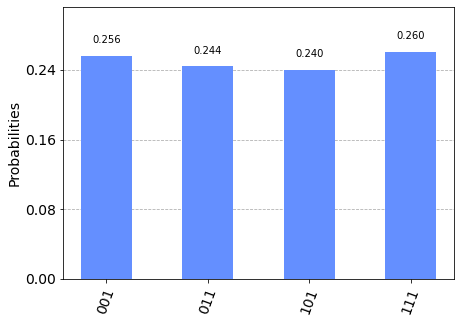

In [21]:
# Plot a histogram
plot_histogram(counts)

### Constant Circuit

In [25]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw()

┌───┐┌───┐┌─┐      
q_0: ─|0>─┤ H ├┤ H ├┤M├──────
          ├───┤├───┤└╥┘┌─┐   
q_1: ─|0>─┤ H ├┤ H ├─╫─┤M├───
          ├───┤├───┤ ║ └╥┘┌─┐
q_2: ─|0>─┤ H ├┤ H ├─╫──╫─┤M├
          └───┘└───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [26]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# transpile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
# https://en.wikipedia.org/wiki/Source-to-source_compiler
compiled_circuit = transpile(circuit, simulator)

# print low level code: open Quantum Assembler
print(compiled_circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



In [27]:
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'000': 1000}


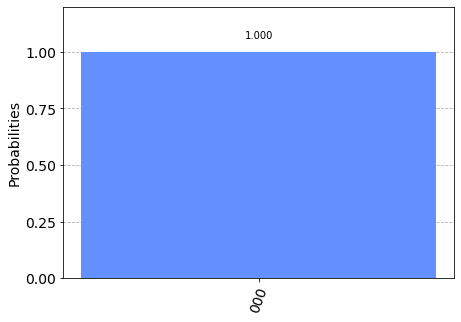

In [28]:
# Plot a histogram
plot_histogram(counts)